# Data Exploration

In [23]:
import pandas as pd

# Load the dataset
data=pd.read_csv('mcdonalds.csv')

# Display column names
print(data.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [24]:
# Display dimensions
print("Number of rows and columns:", data.shape)

Number of rows and columns: (1453, 15)


In [25]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


We will check the average value of each transformed segementation variable.

In [26]:
import numpy as np
# Select columns and convert to numeric
MD_x = data.iloc[:, :11].apply(lambda x: (x == "Yes").astype(int))

# Calculate column means and round to two decimal places
col_means = np.round(MD_x.mean(), 2)

print("Rounded column means:")
print(col_means)

Rounded column means:
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


Applying Principle component Analysis

In [27]:
pip install pydataset


Note: you may need to restart the kernel to use updated packages.


In [28]:

from pydataset import data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary
print("Standard deviation of PCA components:")
print(np.round(np.sqrt(pca.explained_variance_), 2))
print("\nProportion of variance explained by each component:")
print(np.round(pca.explained_variance_ratio_, 2))


Standard deviation of PCA components:
[0.76 0.61 0.5  0.4  0.34 0.31 0.29 0.28 0.27 0.25 0.24]

Proportion of variance explained by each component:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


In [11]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary with specified digits
print("PCA results (rounded to 1 decimal place):")
print(pd.DataFrame(MD_pca).round(1))

PCA results (rounded to 1 decimal place):
       0    1    2    3    4    5    6    7    8    9    10
0     0.4 -0.2  0.7 -0.4  0.2 -0.4 -0.2  0.2  0.2  0.5 -0.6
1    -0.2  0.4 -0.7 -0.1  0.0 -0.1 -0.1 -0.0  0.1  0.5 -0.5
2     0.4  0.7 -0.1  0.7  0.8 -0.7  0.6  0.4 -0.3  0.1  0.2
3    -0.2 -0.4 -0.8  0.2 -0.7 -0.0 -0.1 -0.2 -0.0 -0.3 -0.1
4     0.2 -0.8  0.0  0.5  0.9 -0.1 -0.5  0.2 -0.1  0.0  0.1
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1448  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1 -0.4 -0.5
1449 -1.0  0.0  0.3  0.4 -0.1  0.4 -0.3  0.9 -0.3 -0.2 -0.2
1450 -0.2  1.1  0.2 -0.5 -0.2 -0.2 -0.1 -0.0  0.0  0.1 -0.0
1451 -1.2 -0.0  0.6  0.7  0.0  0.2 -0.0 -0.3  0.0 -0.0 -0.1
1452  1.6  0.3 -0.0  0.2 -0.1  0.3 -0.1  0.3 -0.1 -0.4 -0.5

[1453 rows x 11 columns]


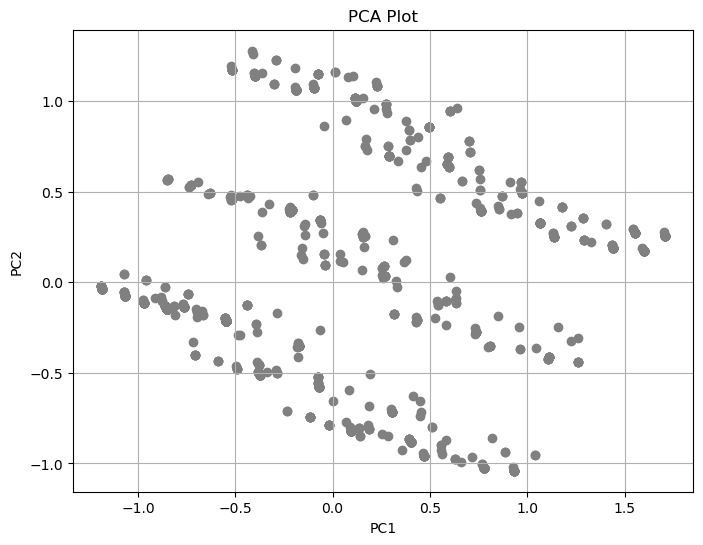

PCA components:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868 

In [13]:
import matplotlib.pyplot as plt
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.title('PCA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Display projection axes
print("PCA components:")
print(pca.components_)

In [15]:
from sklearn.cluster import KMeans
# Set seed for reproducibility (optional in scikit-learn)
np.random.seed(1234)

# Perform K-means clustering
results = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    results[k] = kmeans.labels_

# Choose the best K based on your criteria (e.g., elbow method, silhouette score, etc.)
best_k = 3  # Example: choosing k=3 based on results

# Relabel clusters (if needed)
labels = results[best_k]  # Replace with the appropriate k value from results

# Print the cluster labels
print("Cluster labels (relabeled):")
print(labels)

Cluster labels (relabeled):
[1 0 2 ... 2 0 2]


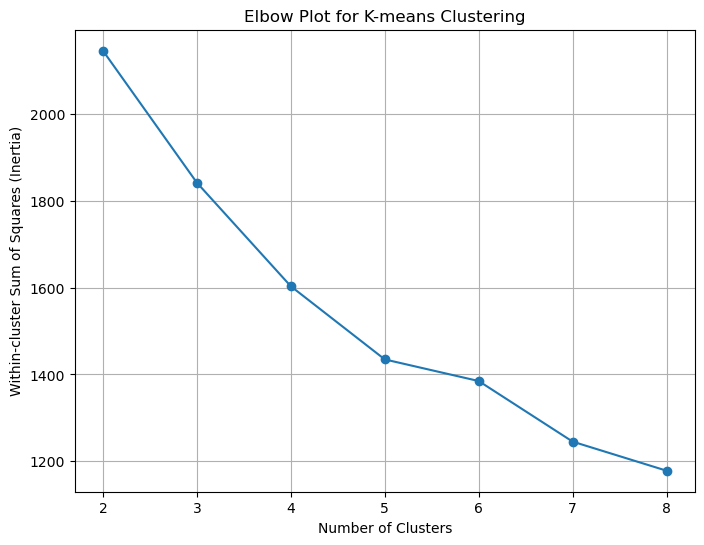

In [16]:
# Set seed for reproducibility (optional in scikit-learn)
np.random.seed(1234)

# Initialize empty list to store inertia values (within-cluster sum of squares)
inertia = []

# Iterate over a range of cluster numbers
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

In [18]:
from sklearn.utils import resample
# Number of bootstrap samples
n_bootstrap = 100

# Initialize a list to store results
bootstrap_results = {}

# Perform bootstrapping
for k in range(2, 9):
    kmeans_results = []
    for _ in range(n_bootstrap):
        # Create bootstrap sample
        bootstrap_sample = resample(MD_x, replace=True, random_state=_)
        
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        kmeans.fit(bootstrap_sample)
        
        # Store cluster labels
        kmeans_results.append(kmeans.labels_)
    
    # Store results for this value of k
    bootstrap_results[k] = kmeans_results

# Example: Accessing results for k=3
print("Example: Cluster labels for k=3 (bootstrap sample 1):")
print(bootstrap_results[3][0])


Example: Cluster labels for k=3 (bootstrap sample 1):
[0 0 2 ... 1 1 0]
